# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [1]:
import numpy as np
def read_subject_info():
    '''
    Return the information in subject_info.txt includes headers and contents
    
    Input: None
    
    Output:
    headers(str): containing the four column headers
    info(float): containing the numerical information for each person
    
    '''
    # Open the dataset and store each line into a list
    lines = open('dataset/subject_info.txt', 'r').readlines()
    
    # Create a list to store four column headers
    # Removes the space symbol at the end and splits the list 
    headers = lines[0].strip().split(',')
    
    # Create a array containing the numerical information for each person
    info = []
    for line in lines[1:]:
        info.append(line.strip().split(','))
        
    # Convert the list to an array and make the type float
    info = np.array(info, dtype=float)
    
    # Convert height units from centimeters to meters
    info.T[2] = info.T[2]/100
    
    return headers, info

---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
def bmi_chart(info):
    '''
    Return the visualisation showing all subjects' heights and weights and
    indicates whether healthy or not
    
    input:
    info(float): An array contains the numerical information for each person
    
    Output:
    No return, just display the visualisation
    
    '''
    # divide the info into weight and height array
    height = info.T[2]
    weight = info.T[1]
      
    # create two list to store the index for healthy or unhealthy people
    # if 18.5 <= BMI <= 24.9 and marks as healthy, other value marks as unhealthy 
    unhealth_list = []
    health_list = []
    for i in range(info.shape[0]):
        BMI = weight[i] / height[i]**2
        if BMI >= 18.5 and BMI <= 24.9:
            health_list.append(i)
        else:
            unhealth_list.append(i)
    
    # create the plot for healthy and unhealthy people' information, 
    # the x-axis indicate the height while the y-axis indicate the weight
    fig, ax = plt.subplots(figsize=(8,6))
    # plot the graph, set the alpha to 0.5, if overlap then the color is deeper
    ax.plot(height[health_list], weight[health_list], 'b.', label = 'Healthy weight', markersize = 15, alpha=0.5)
    ax.plot(height[unhealth_list], weight[unhealth_list], 'r.', label = 'Unhealthy weight', markersize = 15, alpha=0.5)
    
    # set the range for x-axis and y-axis
    ax.set_xlim(1.70, 2.10)
    ax.set_ylim(55, 120)
    
    # set the label for x and y axis
    ax.set_xlabel('Height(m)', fontsize=14)
    ax.set_ylabel('Weight(kg)', fontsize=14)
    
    # set the title
    plt.title('Weight-Health Indicator Graph', fontsize = 14, pad = 15)
    
    # add the legend
    ax.legend(loc='lower right')
    # display the graph
    plt.show()
    

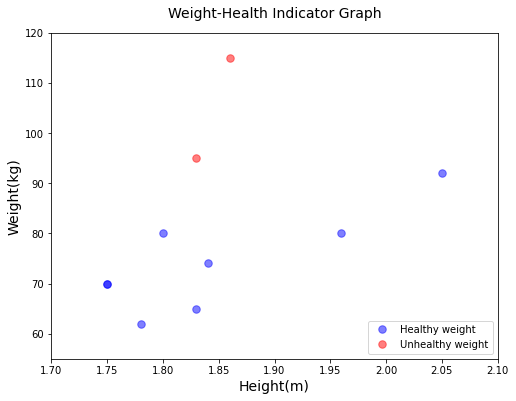

In [3]:
# test the graph
info = read_subject_info()[1]
bmi_chart(info)

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


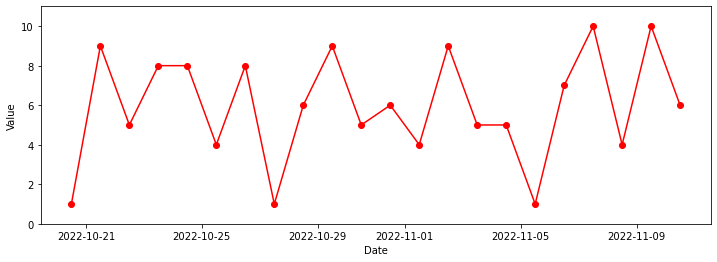

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [5]:
def read_heartbeat_data(subject):
    '''
    Return recorded times and intervals of heartbeats
    
    input:
    subject(int): input the index of different people (1-10)
    
    
    Output:
    times(datetime64[s]): containing the recorded times of each heartbeat
    intervals(float): containing the recorded intervals between heartbeats
    
    '''
    # create the path of the file
    file_path=f'dataset/subject_{subject}/heartbeats.txt'
    
    # open the file 
    file = open(file_path,'r')
    
    # read each line of file except the headers
    lines=file.readlines()[1:]
    
    # delete the empty space and split it by comma, then turn into array
    heartdata = np.array([[i for i in line.strip().split(",")] for line in lines])
    
    # change the type of variable times into datetime64[s]
    times = np.array(heartdata.T[1], dtype = 'datetime64[s]')
    
    # change the type of variable intervals into float
    intervals = np.array(heartdata.T[2], dtype = float)
    
    return times,intervals #output two arrays

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [6]:
def hr_from_intervals(intervals):
    '''
    Return the heart rates from each intervals
    
    input:
    intervals(float): containing the recorded intervals between heartbeats
    
    Output:
    hr(float): containing the instantaneous heart rates, in beats per minute (BPM)
    
    '''
    
    # calculate the heart rate per minute 
    hr = 60/intervals
    
    return hr #output the heart rate

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [7]:
def clean_data(times_raw, hr_raw, prc_low, prc_high):
    '''
    Return two arrays indicate the cleaned times and heart rate
    
    input:
    times_raw(datetime64[s]): an array of timestamps returned by read_heartbeat_data()
    hr_raw(float): an array of computed heart rate values returned by hr_from_intervals()
    prc_low(float),prc_high(float):two numbers such that 0 ≤ prc_low < prc_high ≤ 100 
    
    Output:
    times(datetime64[s]): the time corresponding to heartbeat
    hr(float): the heart rate array between prc_low and prc_high
    
    '''
    # get the upper and lower limits of the reserved heartbeat range
    low_val = np.percentile(hr_raw, prc_low)
    high_val = np.percentile(hr_raw, prc_high)
    
    # create an index list to store the remain index
    remain_index=[]
    
    # if the heart rate in the range then store it into list
    for i in range(len(hr_raw)):
        if hr_raw[i] >= low_val and hr_raw[i] <= high_val:
            remain_index.append(i)
    
    # get the time and heartbeat corresponding to our cleanup based on the retained index
    hr = hr_raw[remain_index]
    times = times_raw[remain_index]
    
    # output the times and hr array
    return times, hr

---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

In [8]:
def evaluate_cleaning(subject):
    '''
    Return two histograms includes the raw heart rate data and the heart rate data after cleaning
    
    input:
    subject(int): input the index of different people (1-10)
    
    Output:
    None, but display two histograms
    
    '''
    # get the raw times and interval
    times_raw,intervals = read_heartbeat_data(subject)
    # get the raw heart rate 
    hr_raw = hr_from_intervals(intervals)
    # get the cleaned times and heart rate, where the bottom 1% and the top 1% of the values have been removed
    times,hr = clean_data(times_raw, hr_raw, 1, 99) 
    
    # define two subgraphs and parameters
    fig, ax = plt.subplots(1,2,figsize=(8, 6))
    
    # the first graph shows a histogram of the raw heart rate data
    ax[0].hist(hr_raw, log=True) #use a logarithmic scale on the y-axis
    # set the label for x and y axis
    ax[0].set_xlabel('Heart Rate(BPM)')
    ax[0].set_ylabel('Count(log)')
    # set the title
    ax[0].set_title('Raw Heart Rate Data')
    
    # the second graph shows a histogram of the heart rate data after cleaning
    ax[1].hist(hr, log=True) # use a logarithmic scale on the y-axis 
    # set the label for x and y axis
    ax[1].set_xlabel('Heart Rate(BPM)')
    ax[1].set_ylabel('Count(log)')
    # set the title
    ax[1].set_title('Cleaning Heart Rate Data')
    
    # adjust the space between two graphs
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # display two histograms
    plt.show()

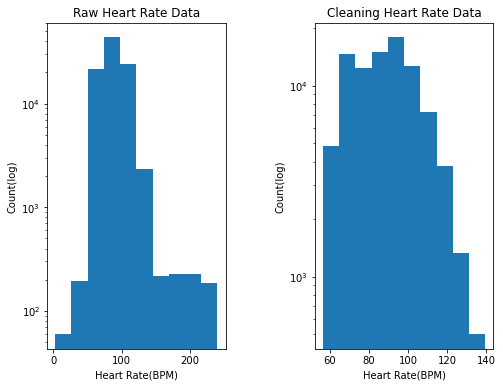

In [9]:
evaluate_cleaning(3)

*Use this Markdown cell to write your explanation for Task 4.*<br /> 
The first one has a distribution of heart rates between 0 and value above 200, which doesn't fit the facts. Once the data has been cleaned, it is clear from the second histogram that essentially all heart rates are between 60 and 140, which is consistent with the fact that heart rates in adults can typically range from about 40 to 160 beats per minute, so this is a reasonable approach to remove likely measurement errors in the heart rate data.

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [10]:
def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's')

def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time


# Demonstrating usage
print('Test for datetime_to_seconds():')
# use first 10 times data of Subject 3 for test, get the data about times and interval
times_raw,intervals = read_heartbeat_data(3)
test_time = times_raw[:10]
# compare the test time and the seconds from the raw time
print(f'  Time: {test_time}')
print(f'  Seconds: {datetime_to_seconds(test_time)}\n')

print('Test for seconds_to_datetime():')
# set a start time (datetime64 object) 
start_time = np.datetime64('2022-10-20 12:00:00')
# set a seconds_elapsed array, which includes number between 0 and 50 with step 5
seconds_elapsed = []
for i in range(0,55,5):
    seconds_elapsed.append(i)
seconds_elapsed = np.array(seconds_elapsed)
# compare the Seconds elapsed and datetime64 object after transforming
print(f'  Seconds elapsed: {seconds_elapsed}')
print(f'  Datetime: {seconds_to_datetime(np.array(seconds_elapsed), start_time)}')

Test for datetime_to_seconds():
  Time: ['2022-07-13T10:18:22' '2022-07-13T10:18:23' '2022-07-13T10:18:23'
 '2022-07-13T10:18:59' '2022-07-13T10:19:00' '2022-07-13T10:19:01'
 '2022-07-13T10:19:02' '2022-07-13T10:19:03' '2022-07-13T10:19:04'
 '2022-07-13T10:19:05']
  Seconds: [ 0.  1.  1. 37. 38. 39. 40. 41. 42. 43.]

Test for seconds_to_datetime():
  Seconds elapsed: [ 0  5 10 15 20 25 30 35 40 45 50]
  Datetime: ['2022-10-20T12:00:00' '2022-10-20T12:00:05' '2022-10-20T12:00:10'
 '2022-10-20T12:00:15' '2022-10-20T12:00:20' '2022-10-20T12:00:25'
 '2022-10-20T12:00:30' '2022-10-20T12:00:35' '2022-10-20T12:00:40'
 '2022-10-20T12:00:45' '2022-10-20T12:00:50']


*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*<br /> 
datetime_to_seconds() uses datetime64[s] array as input and output a float array, which subtracts the first one from each datetime object to get an array in seconds, meaning how many seconds have elapsed at that point in time relative to the start time.<br /> 
seconds_to_datetime() uses a float array and a datetime64[s] object and output a datetime64[s] array. It sets the datetime64[s] object to the start time and sets each element of the float array to the number of seconds elapsed, adding it to the start time to get the array of datetime64[s] objects.

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [11]:
from scipy.interpolate import interp1d

def generate_interpolated_hr(times, hr, time_delta):
    '''
    Return two vectors times_interp and hr_interp of interpolated
    
    input:
    times(datetime64[s]): the time corresponding to heartbeat
    hr(float): containing the instantaneous heart rates, in beats per minute (BPM)
    time_delta（timedelta64[s]):  representing a time interval in seconds
    
    Output:
    times_interp(datetime64[s]): contains regularly spaced datetime64[s] timestamps,
    starting at times[0], ending on or less than time_delta seconds before times[-1],
    and with an interval of time_delta between consecutive times.
    hr_interp(float): contains the heart rate data obtained using linear interpolation 
    and evaluated at each time in times_interp.
    
    '''
    # get the time elapsed by substracting the last time to first time
    time_elapsed = times[-1]-times[0]
    # get the seconds of interval
    seconds = time_elapsed / np.timedelta64(1, 's')
    # create an array to store the equal interval of all seconds
    seconds_elapsed = np.array([i for i in range(0, int(seconds),time_delta)])
    # use function to transform the second to datetime object
    times_interp = seconds_to_datetime(seconds_elapsed, times[0])
    # use linear interpolation get the heart rate function
    f_interp = interp1d(datetime_to_seconds(times), hr)
    # use above function to get the heart rate 
    hr_interp = f_interp(datetime_to_seconds(times_interp))
    
    #return the output
    return times_interp, hr_interp

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

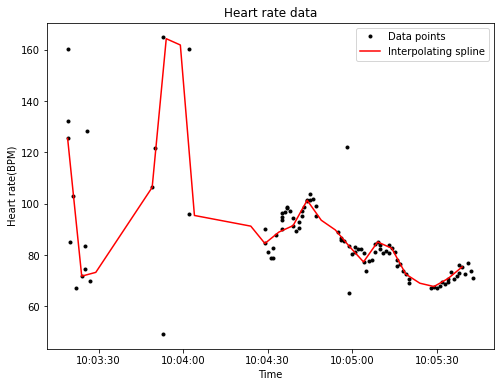

In [12]:
# read the data for subject 1 from the file
times_raw,intervals = read_heartbeat_data(1)
# get the heart rate data
hr_raw = hr_from_intervals(intervals)
# get the cleaned times and heart rate data 
times, hr = clean_data(times_raw, hr_raw, 1, 99)
# generate first 100 interpolated heart rate data and times for time interval of 5 seconds
times_interp, hr_interp = generate_interpolated_hr(times[:100], hr[:100], 5)

# create the figure structure
fig, ax = plt.subplots(figsize=(8, 6))

# plot the origin data point about time and heart rate
ax.plot(times[:100], hr[:100], 'k.', label = 'Data points')
# plot the line by using linear interpolation spline
ax.plot(times_interp, hr_interp, 'r-', label = 'Interpolating spline')
# set the label of x-axis and y-axis
ax.set_xlabel('Time')
ax.set_ylabel('Heart rate(BPM)')
# set the legend and it's position
ax.legend(loc='upper right')
# set title name
ax.set_title('Heart rate data')
# show the picture
plt.show()

*Use this Markdown cell for discussing your interpolation results.*<br /> 
The Interpolating spline fits most of the data points around the line, so the Interpolating spline is as expected.

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [13]:
def rolling_average(times, hr, time_delta, window):
    '''
    Return a NumPy vector hr_rolling to get rolling average of the heart rate
    
    input:
    times(datetime64[s]): the time corresponding to heartbeat
    hr(float): containing the instantaneous heart rates, in beats per minute (BPM)
    time_delta（timedelta64[s]): representing a time interval in seconds
    window(timedelta64[s]): representing the window duration in seconds
    
    Output:
    hr_rolling(float):containing values for the rolling average of the heart rate 
    over time, with the given window size
    
    '''
    
    # generate interpolated heart rate data and times
    times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta)
    # use function to turn the datetime object to float
    seconds = datetime_to_seconds(times_interp)
    # get the number of time in one window
    num_in_window = window//time_delta
    # create a list to store the rolling heart rate
    hr_rolling = []
    # use loop to append average heart rate in window into hr_rolling list 
    for i in range(len(seconds)-num_in_window+1):
        hr_window = [] # create a list to store the heart rate in a window
        for j in range(num_in_window):
            hr_window.append(hr_interp[i+j]) # append the heart rate into list
        # append the average value in a window into the list 
        hr_rolling.append(np.mean(hr_window)) 
    # transform the list to array and the type to float 
    hr_rolling = np.array(hr_rolling, dtype = float)
    # return the vector 
    return hr_rolling

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

In [14]:
def find_index(time, start_time, end_time):
    '''
    Return two integer represent the start and end index of the time vector
    
    input:
    time(datetime64[s]): the time corresponding to heartbeat
    start_time, end_time(datetime64[s]): indicate the start time and end time 
    we want to plot in the graph
    
    Output:
    start_index, end_index(int): indicate the start and end index of the time vector
    
    '''
    # initial the start and end index to 0
    start_index = 0
    end_index = 0
    # use loop to find the start index for the first datetime object in vector 
    # after the start time
    for i in range(len(time)):
        if time[i] >= np.datetime64(start_time):
            start_index= i 
            break #if find the index, then jump the loop
    # use loop to find the end index for the last datetime object in vector 
    # before the end time
    for i in range(len(time)):
        if time[i] > np.datetime64(end_time):
            end_index = i - 1
            break #if find the index, then jump the loop
    # return two index(integer)
    return start_index, end_index

In [15]:
def display_heart_rate(subject):
    '''
    Return one graph contains: 
    1. a plot of the heart rate data found in actigraph.txt over time
    2. a plot of the smoothed heart rate data computed by you from the data in 
    heartbeats.txt, using interpolated measurements of the heart rate every 3 seconds, 
    and a 30-second window size for the averaging.
    
    input:
    subject(int): input the index of different people (1-10)
    
    Output:
    None, but display one single graph
    
    '''
    # variable for p1
    # use f-string to define the file path
    file_path=f'dataset/subject_{subject}/actigraph.txt'
    # open the file
    file = open(file_path,'r')
    # read the file by lines, exclude the header
    lines=file.readlines()[1:]
    # delete the empty space and split it into list, then turn into array
    real_heartdata = np.array([[i for i in line.strip().split(",")] for line in lines])
    # get the time by transpose of array, then set the dtype datetime64
    real_time = np.array(real_heartdata.T[1], dtype = 'datetime64[s]')
    # get the heart rate by transpose of array, then set the dtype float
    real_hr = np.array(real_heartdata.T[2], dtype = float)
    
    # Get the year, month and day of the time (first ten characters) combined 
    # with the desired hour, minute and second data to form the start time and end time
    start_time = np.array((str(real_time[0])[:10] + ' 11:00:00'), dtype = 'datetime64[s]')
    end_time = np.array((str(real_time[0])[:10] + ' 12:00:00'), dtype = 'datetime64[s]')
    
    # use function to get the index
    start_index1, end_index1 = find_index(real_time, start_time, end_time)
    
    # variable for p2
    # use function to read the heartbear data
    times_raw,intervals = read_heartbeat_data(subject)
    # get the heart rate
    hr_raw = hr_from_intervals(intervals)
    # retian the heart rate data and its corresponding time between 1% and 99%
    times, hr = clean_data(times_raw, hr_raw, 1, 99)
    # use interpolated spline to get heart rate data and its corresponding time
    times_interp, hr_interp = generate_interpolated_hr(times, hr, 3)
    # get the rolling average data of heart rate
    hr_rolling = rolling_average(times, hr, 3, 30)
    
    # use function to get the index
    start_index2, end_index2 = find_index(times_interp, start_time, end_time)
    
    # plot the graph
    fig, ax = plt.subplots(1,2,figsize=(12, 8))
    
    # plot the first subgraph about selected heart rate data found in actigraph.txt
    ax[0].plot(real_time[start_index1:end_index1], real_hr[start_index1:end_index1])
    # set the label of x-axis and y-axis
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Heart rate(BPM)')
    # set the title name
    ax[0].set_title('Actigraph data')
    
    # plot the second subgraph about Rolling heartbeats data
    # window/time_delta = 10
    ax[1].plot(times_interp[start_index2:end_index2], hr_rolling[start_index2-10+1:end_index2-10+1])
    # set the label of x-axis and y-axis
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Heart rate(BPM)')
    # set the title name
    ax[1].set_title('Rolling heartbeats data')
    
    # show the graph
    plt.show()
    

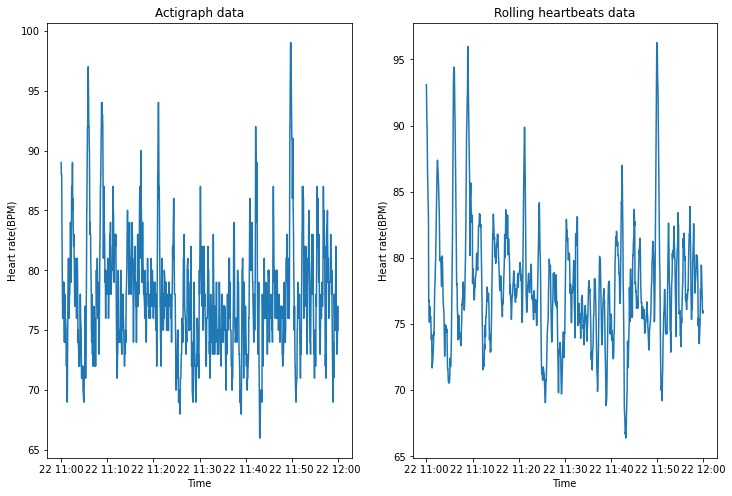

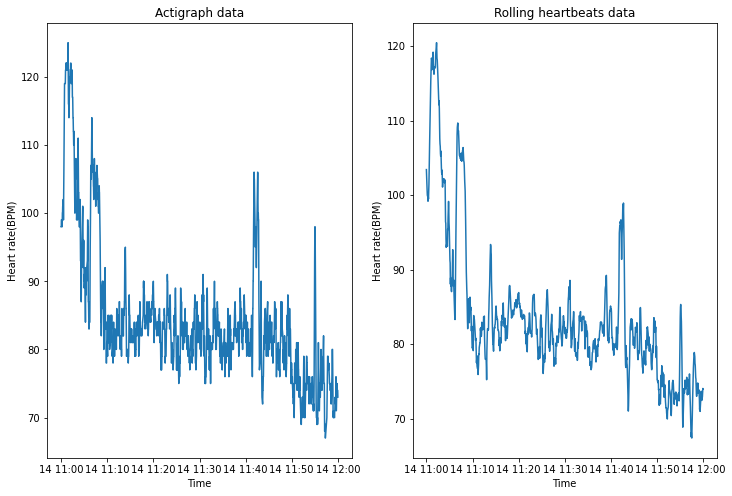

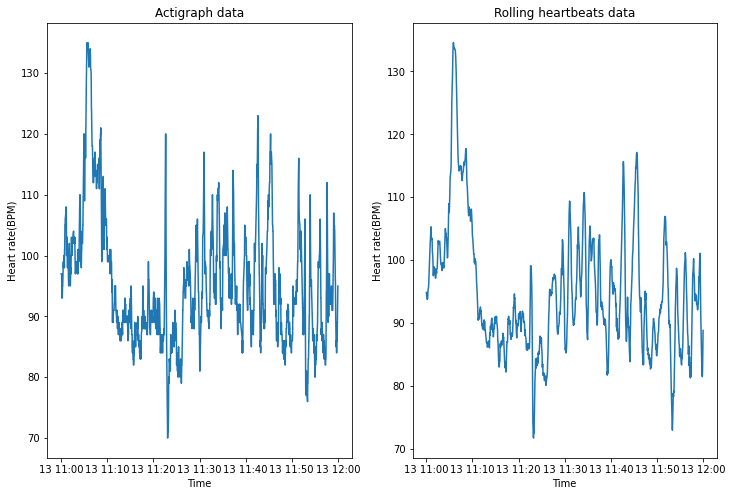

In [16]:
# show three examples
display_heart_rate(1)
display_heart_rate(2)
display_heart_rate(3)

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |

In [17]:
import pandas as pd

In [18]:
# use dataframe to store the whole dataset
dataset_sub = pd.DataFrame(read_subject_info()[1],columns= read_subject_info()[0])
dataset_sub.head()

,Subject,Weight,Height,Age
0,1.0,95.0,1.83,27.0
1,2.0,80.0,1.96,25.0
2,3.0,62.0,1.78,27.0
3,4.0,65.0,1.83,25.0
4,5.0,74.0,1.84,40.0


In [19]:
# add the BMI column
dataset_sub['BMI'] = round(dataset_sub['Weight']/(dataset_sub['Height']**2), 2)
dataset_sub.head()

,Subject,Weight,Height,Age,BMI
0,1.0,95.0,1.83,27.0,28.37
1,2.0,80.0,1.96,25.0,20.82
2,3.0,62.0,1.78,27.0,19.57
3,4.0,65.0,1.83,25.0,19.41
4,5.0,74.0,1.84,40.0,21.86


In [20]:
# to find the relationship, create a list to store the average heart rate of each people
avg_hr_list = []
for i in range(1,11):
    dataset_actigraph = pd.read_csv(f'dataset/subject_{i}/actigraph.txt',index_col = 0)
    # the heart rate got by the mean data
    avg_hr = round(np.mean(dataset_actigraph['Heart rate (BPM)']), 2)
    avg_hr_list.append(avg_hr)

In [21]:
# add the list into the data frame
dataset_sub['Average Heart Rate'] = avg_hr_list
dataset_sub

,Subject,Weight,Height,Age,BMI,Average Heart Rate
0,1.0,95.0,1.83,27.0,28.37,74.53
1,2.0,80.0,1.96,25.0,20.82,74.88
2,3.0,62.0,1.78,27.0,19.57,86.31
3,4.0,65.0,1.83,25.0,19.41,76.16
4,5.0,74.0,1.84,40.0,21.86,72.00
5,6.0,70.0,1.75,20.0,22.86,73.37
6,7.0,115.0,1.86,27.0,33.24,70.39
7,8.0,80.0,1.80,24.0,24.69,91.46
8,9.0,70.0,1.75,29.0,22.86,70.01
9,10.0,92.0,2.05,32.0,21.89,65.30


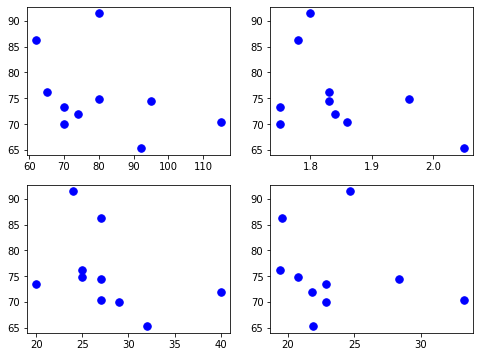

In [22]:
# plot the graph to show the relationship between the hr data and other variables
fig, ax = plt.subplots(2,2,figsize=(8,6))
ax[0][0].plot(dataset_sub['Weight'],dataset_sub['Average Heart Rate'],'b.', markersize=15)
ax[0][1].plot(dataset_sub['Height'],dataset_sub['Average Heart Rate'],'b.', markersize=15)
ax[1][0].plot(dataset_sub['Age'],dataset_sub['Average Heart Rate'],'b.', markersize=15)
ax[1][1].plot(dataset_sub['BMI'],dataset_sub['Average Heart Rate'],'b.', markersize=15)
plt.show()

In the graphs, we can find there are no significant relationship between personal parameters and heart rate

In [23]:
# check the distribution of step in each subject
for i in range(1,11):
    # read the actigraph.txt file
    dataset_actigraph = pd.read_csv(f'dataset/subject_{i}/actigraph.txt',index_col = 0)
    # choose the step column into list
    step_list = dataset_actigraph['Steps'].to_list()
    # get the unique step value
    step_type = sorted(list(set(step_list)))
    # create a list to store the frequency of each step
    step_fre = []
    for j in step_type:
        step_fre.append(step_list.count(j)) # append the frquency into list
    # use a dictionary to store the type and frequnecy
    step_info = dict(zip(step_type, step_fre))
    # print the dictionary
    print(step_info)

{0: 49890, 1: 9609, 2: 1283, 3: 80}
{0: 57625, 1: 6740, 2: 678, 3: 11}
{0: 56713, 1: 9559, 2: 1112, 3: 16}
{0: 58548, 1: 8926, 2: 1180, 3: 59, 4: 1}
{0: 47345, 1: 12536, 2: 1762, 3: 34, 4: 1}
{0: 56148, 1: 6128, 2: 1128, 3: 716, 4: 1}
{0: 51000, 1: 15054, 2: 2295, 3: 13}
{0: 56508, 1: 13636, 2: 894, 3: 7}
{0: 56566, 1: 7400, 2: 750, 3: 24}
{0: 55769, 1: 10869, 2: 1223, 3: 13}


Above all, we can find that most of data are between step 0-3, so we ignore the step 4 to discuss

In [24]:
def draw_stepbox(subject):
    '''
    Return four boxplots contain the heart rate and the step 0 to 3
    
    input:
    subject(int): input the index of different people (1-10)
    
    Output:
    None, but display the graph
    
    '''
    # read the data
    dataset_actigraph = pd.read_csv(f'dataset/subject_{subject}/actigraph.txt',index_col = 0)
    
    # create the plot structure
    fig, ax = plt.subplots(1, 4, figsize=(15,6))
    # set the range of y-axis and the label
    for i in range(4):
        ax[i].set_ylim([0,250])
        ax[i].set_xlabel(f'Step:{i}')
        ax[i].set_ylabel('Heart rate(BPM)')
        # set four variable to store the heart rate of different step
        hr_step = dataset_actigraph[dataset_actigraph['Steps'] == i]['Heart rate (BPM)']
        ax[i].boxplot(hr_step) # plot the box graph
        
    # set the title
    plt.suptitle(f'Heart rate of Subject {subject} in different steps')
    # adjust the space of interval 
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # show the graph
    plt.show()

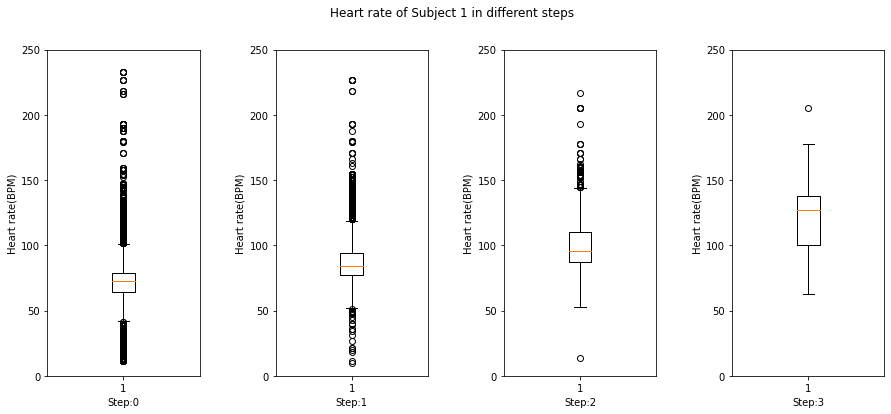

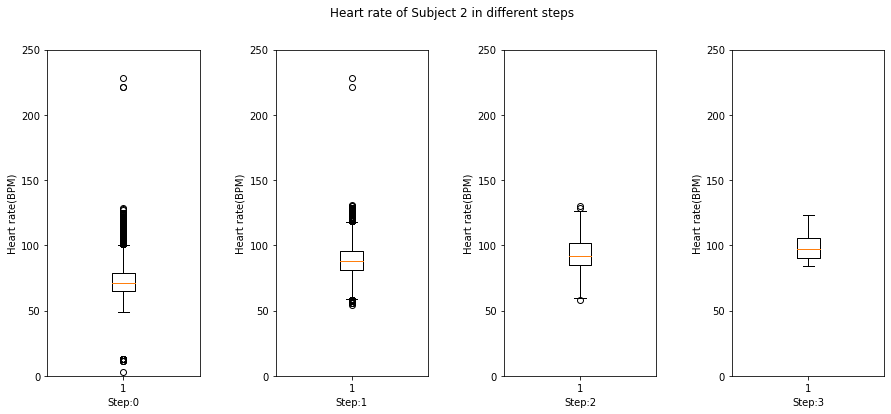

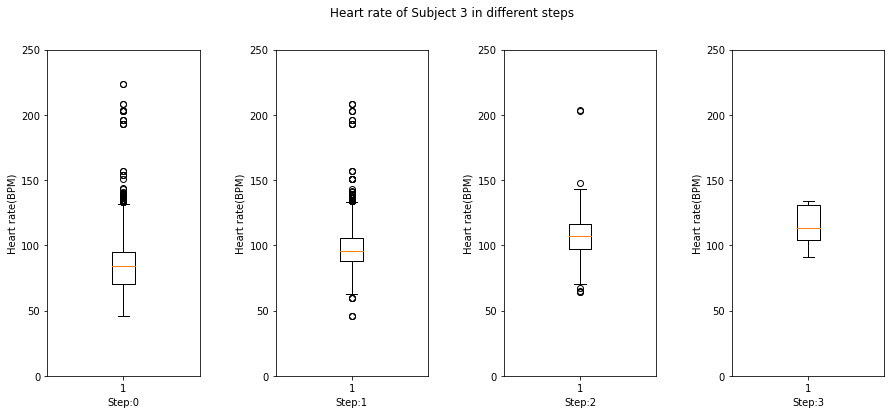

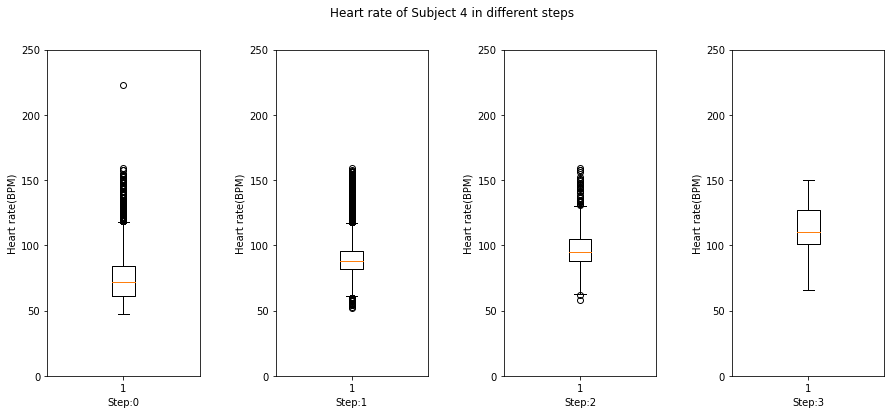

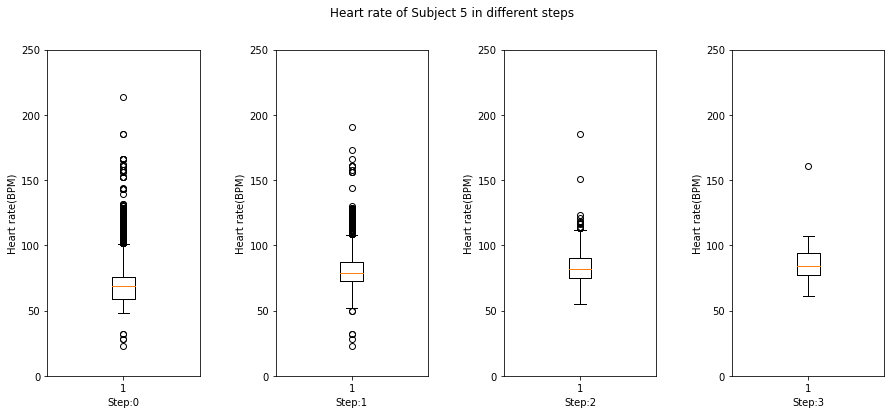

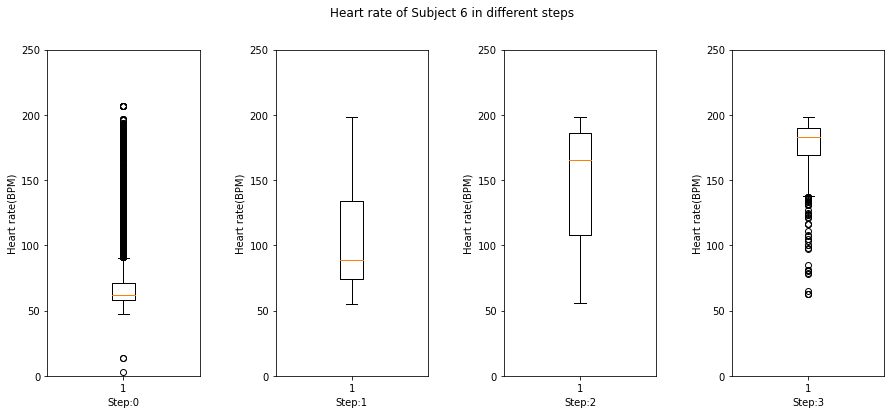

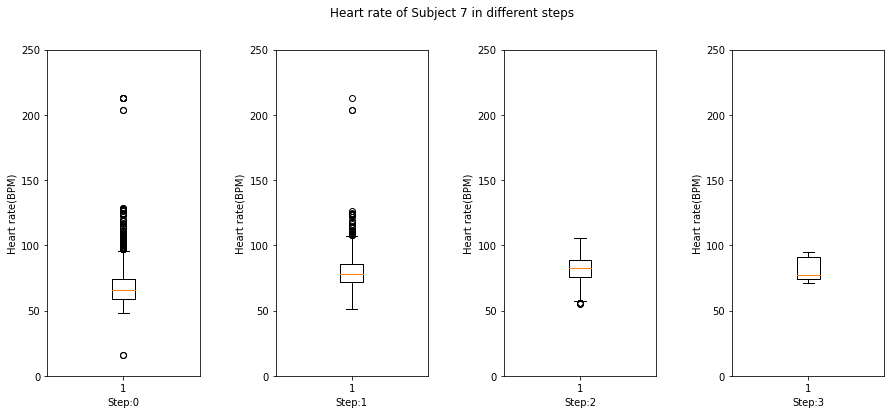

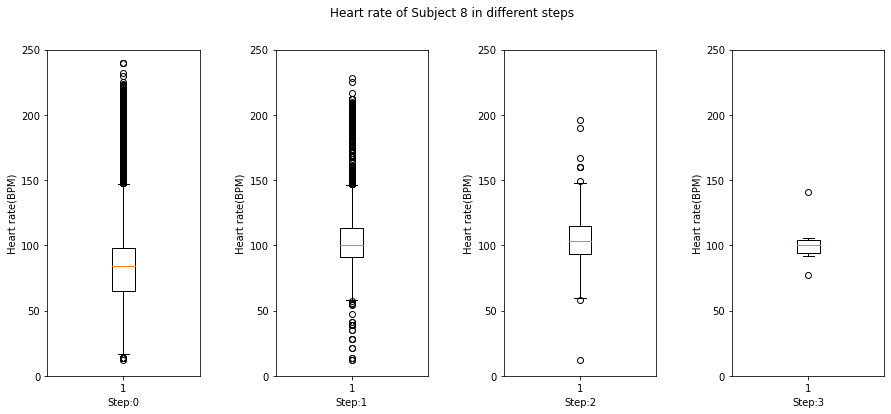

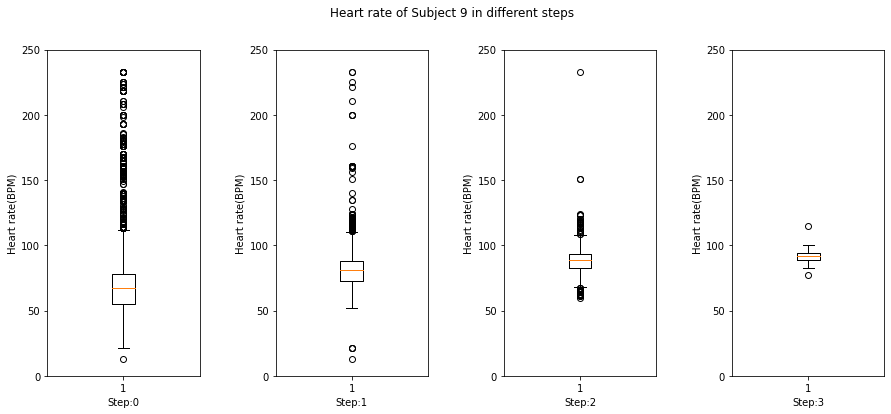

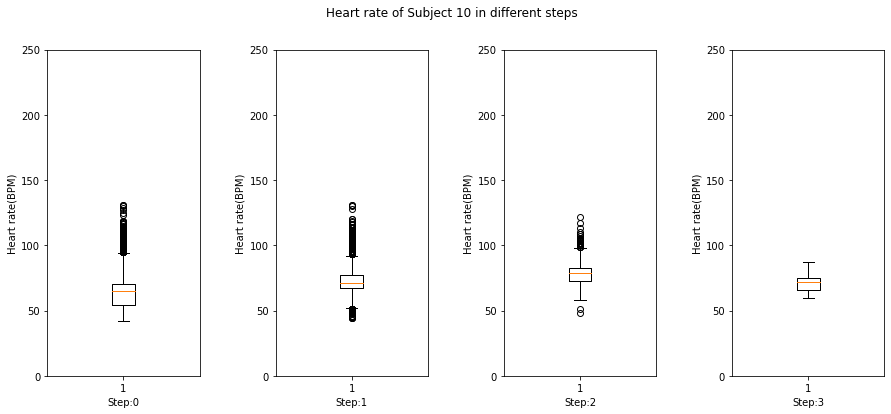

In [25]:
# step3 > step2 > step1 > step0
# show the boxplot of each people
for i in range(1,11):
    draw_stepbox(i)

From the box plot above, it is clear that the heartbeat is faster when the number of steps is larger

In [26]:
def draw_statebox(subject):
    '''
    Return three boxplots contain the heart rate in different state 
    
    input:
    subject(int): input the index of different people (1-10)
    
    Output:
    None, but display the graph
    
    '''
    # read the data 
    dataset_actigraph = pd.read_csv(f'dataset/subject_{subject}/actigraph.txt',index_col = 0)
    # Separate statistics of heartbeats in different states
    hr_stand = dataset_actigraph[dataset_actigraph['Inclinometer Standing']==1]['Heart rate (BPM)']
    hr_sit = dataset_actigraph[dataset_actigraph['Inclinometer Sitting']==1]['Heart rate (BPM)']
    hr_lie = dataset_actigraph[dataset_actigraph['Inclinometer Lying']==1]['Heart rate (BPM)']
    
    # create the structure of graph
    fig, ax = plt.subplots(1, 3, figsize=(12,8))
    # set the range and label of y-axis
    for i in range(3):
        ax[i].set_ylim([0,200])
        ax[i].set_ylabel('Heart rate(BPM)')
    # set the label of x-axis
    ax[0].set_xlabel('Stand')
    ax[1].set_xlabel('Sit')
    ax[2].set_xlabel('Lie')
    
    # plot the boxplot
    ax[0].boxplot(hr_stand)
    ax[1].boxplot(hr_sit)
    ax[2].boxplot(hr_lie)
    
    # adjust the space of interval
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # set the title
    plt.suptitle(f'Heart rate of Subject {subject} in three states')
    # show the graph
    plt.show()

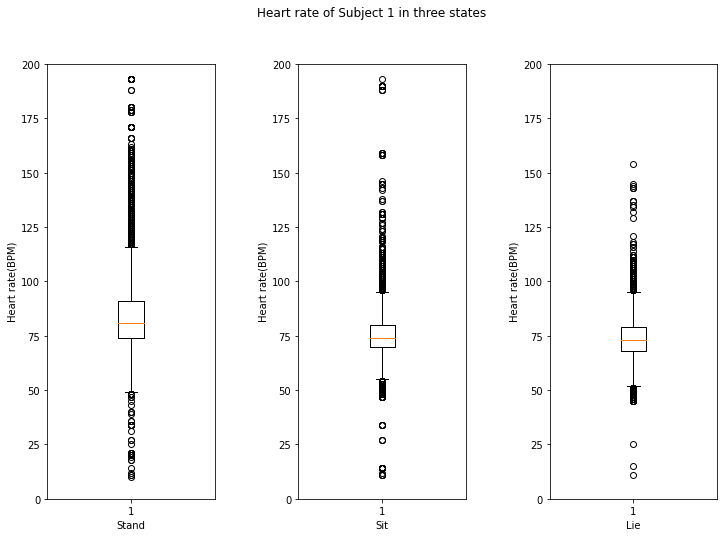

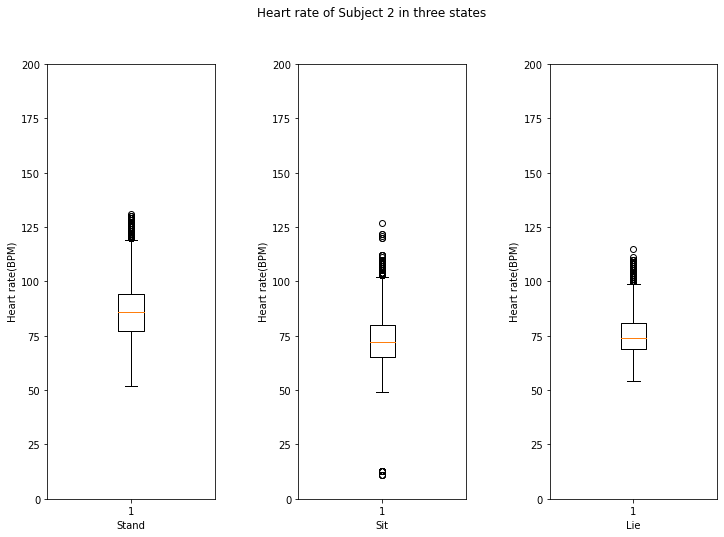

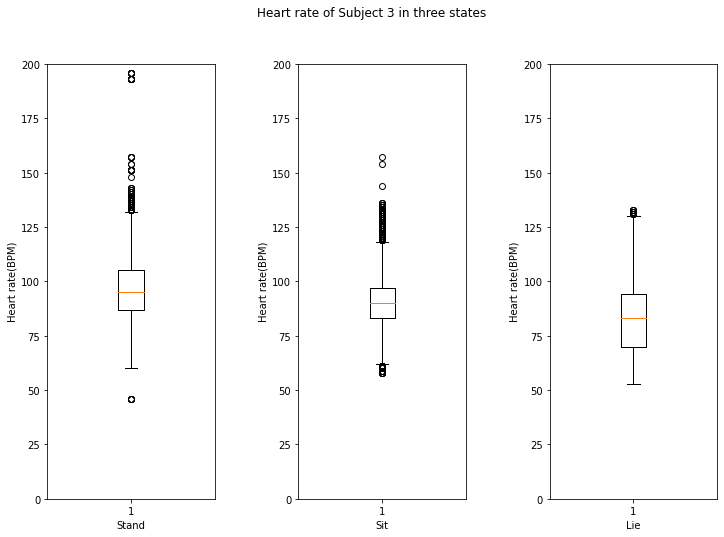

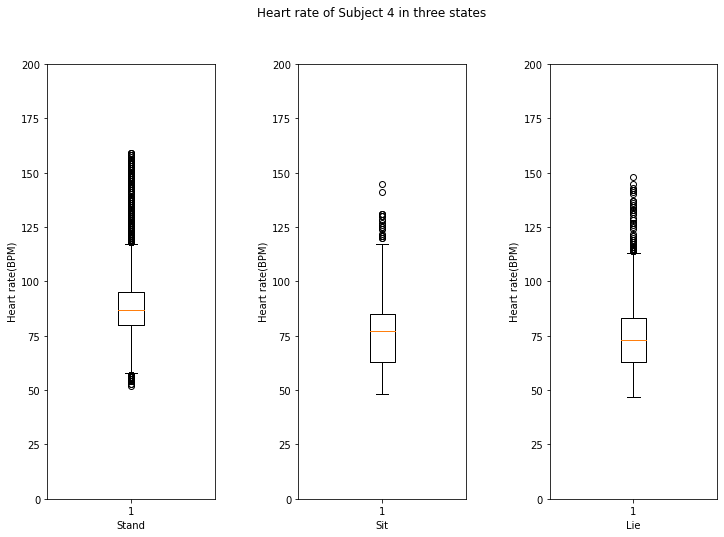

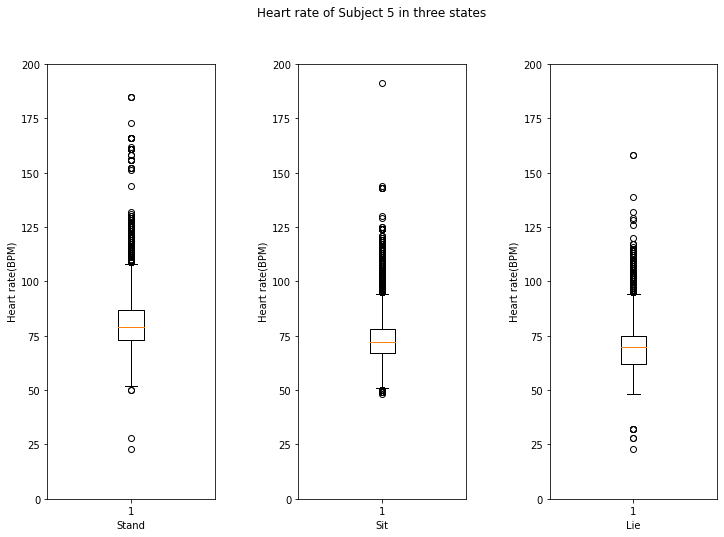

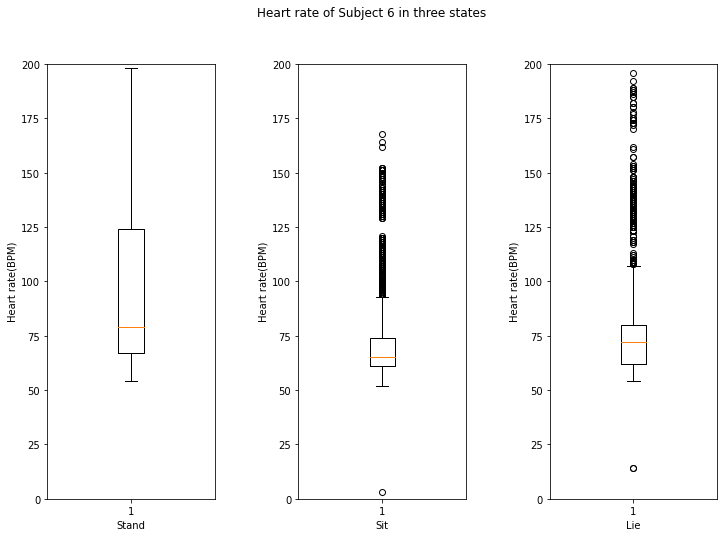

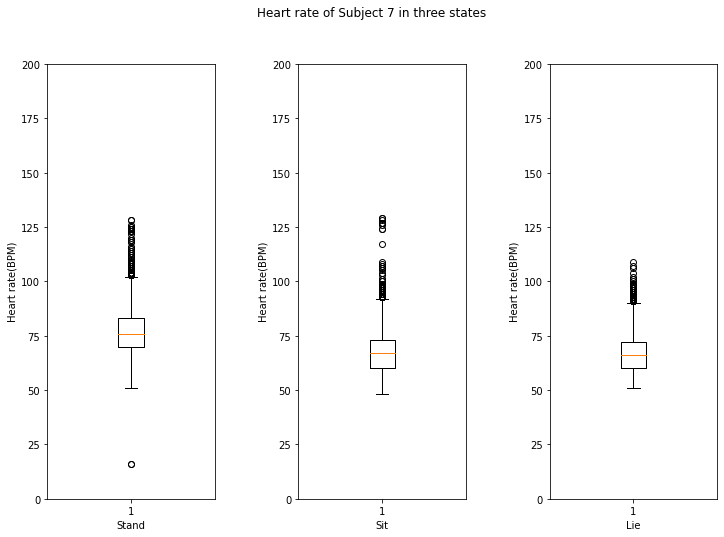

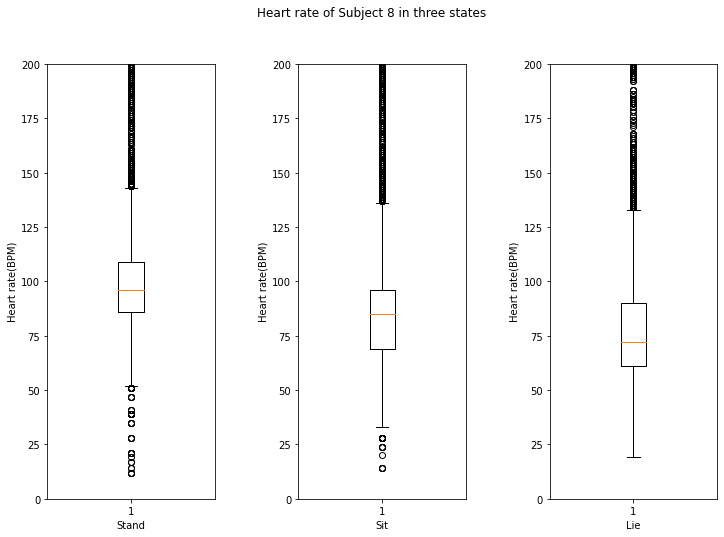

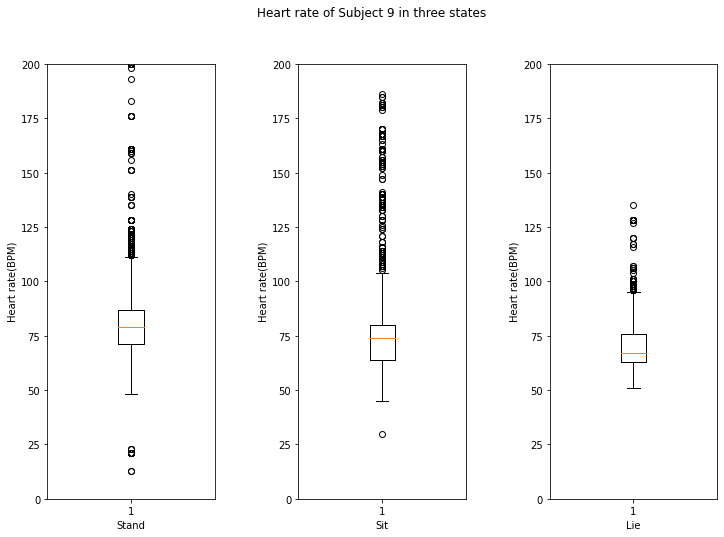

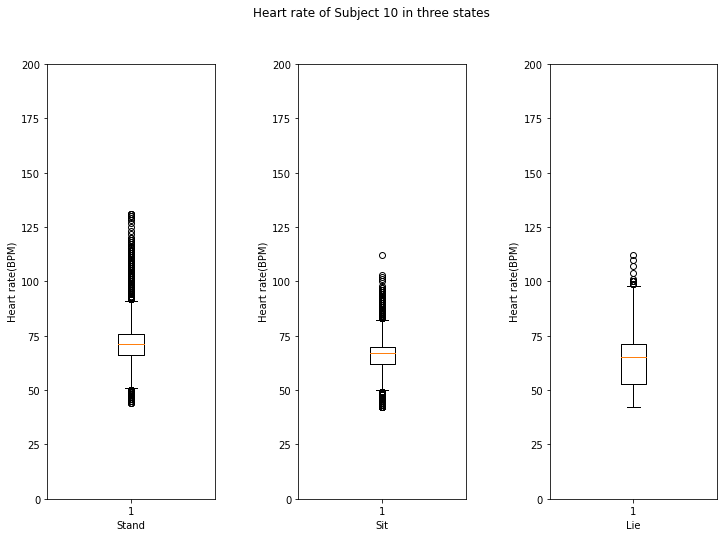

In [27]:
#stand > sit > lie
#show the boxplot of each people
for i in range(1,11):
    draw_statebox(i)

The box plot above shows that in most cases the heart rate is faster when standing than when sitting, and greater when sitting than when lying down